# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
cities

['sokolka',
 'ushuaia',
 'faanui',
 'kahului',
 'moerai',
 'dungarpur',
 'tilichiki',
 'clyde river',
 'hithadhoo',
 'porto novo',
 'asyut',
 'tuktoyaktuk',
 'las palmas',
 'bluff',
 'nikolskoye',
 'kopyevo',
 'iqaluit',
 'mataura',
 'bonfim',
 'bracebridge',
 'port alfred',
 'port moresby',
 'rocha',
 'dikson',
 'sinnamary',
 'barrow',
 'qaanaaq',
 'albany',
 'cidreira',
 'hermanus',
 'jamestown',
 'kodiak',
 'chernyshevskiy',
 'vaitupu',
 'tara',
 'alvorada',
 'pangody',
 'isangel',
 'east london',
 'muroto',
 'consolacion del sur',
 'ituni',
 'punta arenas',
 'lorengau',
 'severo-kurilsk',
 'sakakah',
 'lang son',
 'victoria',
 'araouane',
 'rikitea',
 'grand river south east',
 'norman wells',
 'vaini',
 'cape town',
 'bathsheba',
 'zhigansk',
 'ondjiva',
 'naze',
 'ketchikan',
 'sitka',
 'kapaa',
 'honiara',
 'weligama',
 'mujiayingzi',
 'qasigiannguit',
 'gaoyou',
 'lichtenburg',
 'san carlos de bariloche',
 'perelyub',
 'provideniya',
 'barentsburg',
 'barela',
 'warqla',
 'san 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
# Save config information.


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = "9d685dea3c99b3a25afb99d8a3ffe4b6"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [57]:
# set up lists to hold reponse info
citydict = []

cityname = []
cloud = []
country = []
date = []
humid = []
lat = []
lng = []
maxtemp = []
windspeed = []

counter = 1
setnum = 1
print("Beginning Data Retrieval")
print("------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    print(f"Processing Record {counter} of Set {setnum} | {city}")
    
    counter = counter + 1
    
    response = requests.get(query_url + city)
    data = response.json()
    
    if(response.status_code == 200):
        
        cityname.append(data["name"])
        cloud.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        humid.append(data["main"]["humidity"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        maxtemp.append(data["main"]["temp_max"])
        windspeed.append(data["wind"]["speed"])
        
        citydict = {"City": cityname,
                    "Cloudiness": cloud,
                    "Country": country,
                    "Date": date,
                    "Humidity": humid,
                    "Lat": lat,
                    "Lng": lng,
                    "Max Temp": maxtemp,
                    "Wind Speed": windspeed}
       
    else:
        print(f"City:{city} was not found. | Retrieving data for next entry.")
        setnum = setnum + 1
    time.sleep(1)
   

print("--------------------------")
print("Data Retrieval is Complete")
print("--------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | sokolka
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | kahului
Processing Record 5 of Set 1 | moerai
Processing Record 6 of Set 1 | dungarpur
Processing Record 7 of Set 1 | tilichiki
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | porto novo
Processing Record 11 of Set 1 | asyut
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | las palmas
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | kopyevo
City:kopyevo was not found. | Retrieving data for next entry.
Processing Record 17 of Set 2 | iqaluit
Processing Record 18 of Set 2 | mataura
Processing Record 19 of Set 2 | bonfim
Processing Record 20 of Set 2 | bracebridge
Processing Record 21 of Set 2 | port alfred
Processing Record 22 of Set 2 | p

Processing Record 162 of Set 21 | kaeo
Processing Record 163 of Set 21 | batemans bay
Processing Record 164 of Set 21 | bengkulu
City:bengkulu was not found. | Retrieving data for next entry.
Processing Record 165 of Set 22 | macaboboni
City:macaboboni was not found. | Retrieving data for next entry.
Processing Record 166 of Set 23 | ngukurr
City:ngukurr was not found. | Retrieving data for next entry.
Processing Record 167 of Set 24 | sentyabrskiy
City:sentyabrskiy was not found. | Retrieving data for next entry.
Processing Record 168 of Set 25 | jeremie
Processing Record 169 of Set 25 | leningradskiy
Processing Record 170 of Set 25 | port blair
Processing Record 171 of Set 25 | attawapiskat
City:attawapiskat was not found. | Retrieving data for next entry.
Processing Record 172 of Set 26 | puerto ayora
Processing Record 173 of Set 26 | chorozinho
Processing Record 174 of Set 26 | chuy
Processing Record 175 of Set 26 | yumen
Processing Record 176 of Set 26 | kayerkan
Processing Record

Processing Record 321 of Set 42 | hobyo
Processing Record 322 of Set 42 | upington
Processing Record 323 of Set 42 | kokopo
Processing Record 324 of Set 42 | carndonagh
Processing Record 325 of Set 42 | nuuk
Processing Record 326 of Set 42 | elat
Processing Record 327 of Set 42 | tuatapere
Processing Record 328 of Set 42 | cherskiy
Processing Record 329 of Set 42 | ngunguru
Processing Record 330 of Set 42 | verkhnyaya toyma
Processing Record 331 of Set 42 | faya
Processing Record 332 of Set 42 | pimentel
Processing Record 333 of Set 42 | zaraza
Processing Record 334 of Set 42 | makakilo city
Processing Record 335 of Set 42 | touros
Processing Record 336 of Set 42 | awjilah
Processing Record 337 of Set 42 | areosa
Processing Record 338 of Set 42 | maunabo
Processing Record 339 of Set 42 | druskininkai
Processing Record 340 of Set 42 | mazagao
Processing Record 341 of Set 42 | anadyr
Processing Record 342 of Set 42 | atasu
Processing Record 343 of Set 42 | mananjary
Processing Record 344

Processing Record 495 of Set 55 | koumac
Processing Record 496 of Set 55 | bajo baudo
City:bajo baudo was not found. | Retrieving data for next entry.
Processing Record 497 of Set 56 | yulara
Processing Record 498 of Set 56 | teahupoo
Processing Record 499 of Set 56 | tromso
Processing Record 500 of Set 56 | acapulco
Processing Record 501 of Set 56 | aporawan
City:aporawan was not found. | Retrieving data for next entry.
Processing Record 502 of Set 57 | daxian
City:daxian was not found. | Retrieving data for next entry.
Processing Record 503 of Set 58 | otofuke
Processing Record 504 of Set 58 | trelew
Processing Record 505 of Set 58 | otane
Processing Record 506 of Set 58 | markala
Processing Record 507 of Set 58 | oil city
Processing Record 508 of Set 58 | xiongzhou
Processing Record 509 of Set 58 | sisimiut
Processing Record 510 of Set 58 | omsukchan
Processing Record 511 of Set 58 | mahanoro
Processing Record 512 of Set 58 | yomou
Processing Record 513 of Set 58 | buala
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
summary = citydata.count()
summary

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [45]:
citydata = pd.DataFrame(citydict)
citydata.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sokolka,92,RU,1552661348,89,52.46,43.89,28.00,10.11
1,Ushuaia,0,AR,1552658400,51,-54.81,-68.31,59.00,13.87
2,Faanui,48,PF,1552661350,100,-16.48,-151.75,82.27,5.19
3,Kahului,1,US,1552661192,73,20.89,-156.47,69.80,4.70
4,Moerai,64,PF,1552661353,100,-22.43,-151.33,79.12,24.54
5,Dungarpur,0,IN,1552661354,31,23.85,73.71,73.36,8.55
6,Tilichiki,0,RU,1552661355,39,60.47,166.10,-26.45,2.62
7,Clyde River,75,CA,1552658400,83,70.47,-68.59,-11.21,6.93
8,Hithadhoo,92,MV,1552661144,100,-0.60,73.08,83.98,6.64
9,Porto Novo,75,BR,1552658400,73,-23.68,-45.44,77.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

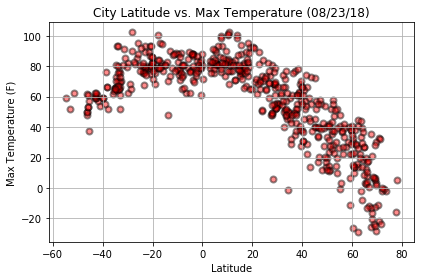

In [52]:
# Build the scatter plots for each city types
citylatvsmaxtemp = plt.scatter(citydata["Lat"], citydata["Max Temp"], marker="o", c = "red",
                              edgecolors="black", alpha=0.45, linewidths= 2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/23/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# Create a legend

# Incorporate a text label regarding circle size


# Save Figure

plt.tight_layout()
plt.savefig("/Users/kurtshiple/Desktop/UNCBootcampLocalHWFolders/Homework6:API/final/citylatvsmaxtemp",bbox_inches='tight')
plt.show()

#### Latitude vs. Humidity Plot

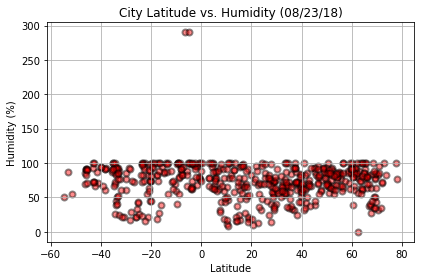

In [54]:
# Build the scatter plots for each city types
citylatvshumidity = plt.scatter(citydata["Lat"], citydata["Humidity"], marker="o", c = "red",
                              edgecolors="black", alpha=0.45, linewidths= 2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (08/23/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

plt.tight_layout()
plt.savefig("/Users/kurtshiple/Desktop/UNCBootcampLocalHWFolders/Homework6:API/final/citylatvshumidity",bbox_inches='tight')
plt.show()

#### Latitude vs. Cloudiness Plot

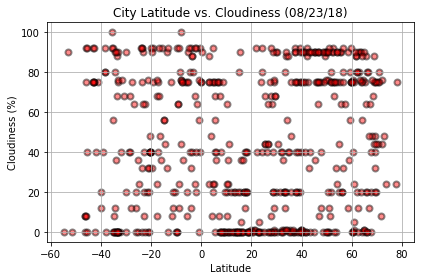

In [55]:
# Build the scatter plots for each city types
citylatvshumidity = plt.scatter(citydata["Lat"], citydata["Cloudiness"], marker="o", c = "red",
                              edgecolors="black", alpha=0.45, linewidths= 2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (08/23/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# Create a legend

# Incorporate a text label regarding circle size


# Save Figure

plt.tight_layout()
plt.savefig("/Users/kurtshiple/Desktop/UNCBootcampLocalHWFolders/Homework6:API/final/citylatvscloudiness",bbox_inches='tight')
plt.show()

#### Latitude vs. Wind Speed Plot

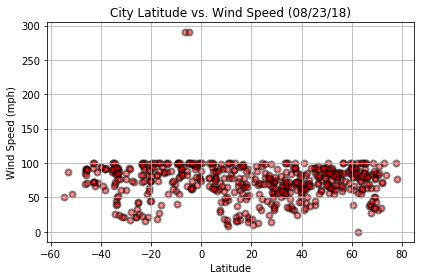

In [56]:
# Build the scatter plots for each city types
citylatvshumidity = plt.scatter(citydata["Lat"], citydata["Humidity"], marker="o", c = "red",
                              edgecolors="black", alpha=0.45, linewidths= 2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (08/23/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# Create a legend

# Incorporate a text label regarding circle size


# Save Figure

plt.tight_layout()
plt.savefig("/Users/kurtshiple/Desktop/UNCBootcampLocalHWFolders/Homework6:API/final/citylatvswindspeed",bbox_inches='tight')
plt.show()